# ᯓ★ CompProgramming FinalProject 𖦹

โครงการนี้เป็นส่วนหนึ่งของวิชา Computer Programming (Final Project) มีจุดประสงค์เพื่อวิเคราะห์ข้อมูลผู้ป่วยโรคหัวใจจากชุดข้อมูล [Heart Disease Dataset (Kaggle)](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?utm_source=chatgpt.com)เพื่อทำความเข้าใจปัจจัยที่มีผลต่อความเสี่ยงของโรคหัวใจ และสร้างโมเดลเบื้องต้นในการทำนายความเป็นไปได้ของโรค

Q1) ปัจจัยไหน “มีผลมากที่สุด” ต่อความเสี่ยงโรคหัวใจ?  
Q2) ความเสี่ยงต่างกันระหว่างเพศหรือไม่?

โปรเจกต์สุดท้ายของรายวิชา Computer Programming  
พัฒนาและรันผ่าน **Google Colab** ข้อมูลเก็บไว้ใน **Google Drive**  
[อิโมจิน่ารักๆ](https://emojidb.org/%E0%B8%AD%E0%B8%B4%E0%B9%82%E0%B8%A1%E0%B8%88%E0%B8%B4%E0%B8%99%E0%B9%88%E0%B8%B2%E0%B8%A3%E0%B8%B1%E0%B8%81%E0%B9%86%2B%E0%B8%9F%E0%B8%AD%E0%B8%A3%E0%B9%8C%E0%B8%99-emojis)



---

## ⤷ ข้อมูลใน 𐙚 Google Drive ꒱
ข้อมูลที่ใช้ในการรันโปรเจกต์:  [![Open in Google Drive](https://img.shields.io/badge/Open_in-Google_Drive-blue?logo=googledrive)](https://drive.google.com/drive/folders/1tC-hfx4OoB3O1uyt3N0mLJQvuS8rCNH7?usp=sharing)  
google sheet: [![Google Sheets](https://img.shields.io/badge/Google%20Sheets-34A853?logo=googlesheets&logoColor=white)](https://docs.google.com/spreadsheets/d/1QPkiJP5epP3xQX_5K-vWH7fcS9PBnUmG6IHK-NEoS1k/edit?usp=sharing)


---

## 「 ✦ Developer ✦ 」
- ชื่อ: `นายกิตติภูมิ นาคนัตถ์ `
- รหัสนักศึกษา: `6704053611060`
- วิชา: `CompProgramming_040563109`
- Github: [![GitHub](https://img.shields.io/badge/View_on-GitHub-black?logo=github)](https://github.com/KittipoomNaknut)
- Email: [![Send Email](https://img.shields.io/badge/Send_Email-D14836?logo=gmail&logoColor=white)](mailto:kittipoomnak02@gmail.com)
- IG: [![Instagram](https://img.shields.io/badge/Follow_on-Instagram-E4405F?logo=instagram&logoColor=white)](https://www.instagram.com/userkxtti/)
- Facebook: [![Facebook](https://img.shields.io/badge/View_on-Facebook-1877F2?logo=facebook&logoColor=white)](https://www.facebook.com/kittipoom.naknut?locale=th_TH)



---


# เตรียมความพร้อม ૮₍˃̵֊ ˂̵ ₎ა
## ༘⋆✿ ติดตั้งPackage / เรียกใช้Module ในส่วนนี้


────────────────────────୨ৎ──────────────────────────


os → ใช้จัดการ path และ directory ภายในระบบปฏิบัติการ

gdown → ใช้ดาวน์โหลดข้อมูลจาก Google Drive

pandas → ใช้จัดการและวิเคราะห์ข้อมูลในรูปแบบ DataFrame

Path จาก pathlib → ใช้เขียน path

sklearn สำหรับ Modeling & Inference

In [ ]:
!pip install -q gdown

In [ ]:
import os
import gdown
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, ConfusionMatrixDisplay)

# Import Data ◡̈
---

เราจะใช้ gdown
 เพื่อดาวโหลดไฟล์จาก Google Drive ไม่ต้องอัพโหลดเอง  และใช้

In [ ]:
FILE_ID = "1tBUdqLdWQCANANBNTigLw1zuTlvjR2ql"
FILENAME = "heart.csv"
SAVE_PATH = Path("/content") / FILENAME

def download_from_gdrive(file_id: str, output_path: Path):
    if output_path.exists():
        print(f"มีไฟล์อยู่แล้ว...เรียกใช้ได้เลย👉🏼 {output_path}")
    else:
        url = f"https://drive.google.com/uc?id={file_id}"
        print(f"⬇Downloading from Google Drive...\n{url}")
        gdown.download(url, str(output_path), quiet=False)
        print(f"\n😻ดาวโหลดเสร็จแล้วจ้า👉🏼 {output_path}")

download_from_gdrive(FILE_ID, SAVE_PATH)

มีไฟล์อยู่แล้ว...เรียกใช้ได้เลย👉🏼 /content/heart.csv


In [ ]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Dictionary (อธิบายแต่ละคอลัมน์) 🫧

| ชื่อคอลัมน์ | ความหมาย | ประเภทข้อมูล | หมายเหตุ |
|---------------|-----------|----------------|-----------|
| age | อายุของผู้ป่วย (ปี) | ตัวเลข (int) | ค่าอายุอยู่ระหว่าง 29–77 |
| sex | เพศของผู้ป่วย | หมวดหมู่ (0=หญิง, 1=ชาย) | ใช้เปรียบเทียบความเสี่ยงระหว่างเพศ |
| cp | ประเภทอาการเจ็บหน้าอก | หมวดหมู่ (0–3) | 0=typical angina, 1=atypical, 2=non-anginal, 3=asymptomatic |
| trestbps | ความดันโลหิตขณะพัก (mm Hg) | ตัวเลข (int) | ค่าเกิน 140 ถือว่าสูง |
| chol | ระดับคอเลสเตอรอลในเลือด (mg/dl) | ตัวเลข (int) | ค่าเกิน 240 ถือว่าสูง |
| fbs | น้ำตาลในเลือดขณะอดอาหาร >120 mg/dl หรือไม่ | หมวดหมู่ (1=ใช่, 0=ไม่ใช่) | ใช้ประเมินความเสี่ยงโรคเบาหวาน |
| restecg | ผลคลื่นไฟฟ้าหัวใจขณะพัก | หมวดหมู่ (0–2) | 0=ปกติ, 1=ST-T abnormality, 2=LV hypertrophy |
| thalach | อัตราการเต้นหัวใจสูงสุดที่ทำได้ | ตัวเลข (int) | ตัวบ่งชี้สมรรถภาพหัวใจ |
| exang | มีอาการเจ็บหน้าอกจากการออกกำลังกายหรือไม่ | หมวดหมู่ (1=ใช่, 0=ไม่ใช่) | แสดงการตอบสนองของหัวใจต่อการออกแรง |
| oldpeak | ST depression จาก exercise เทียบกับ rest | ตัวเลข (float) | ยิ่งมากยิ่งเสี่ยง |
| slope | ความชันของ ST segment | หมวดหมู่ (0–2) | 0=upsloping, 1=flat, 2=downsloping |
| ca | จำนวนหลอดเลือดหลักที่เห็นจาก fluoroscopy | ตัวเลข (0–3) | ยิ่งมากแสดงการตีบของหลอดเลือดมากขึ้น |
| thal | ภาวะ Thalassemia | หมวดหมู่ (1–3) | 1=normal, 2=fixed defect, 3=reversible defect |
| target | การวินิจฉัยโรคหัวใจ | หมวดหมู่ (0=ไม่มี, 1=มี) | เป็นตัวแปรเป้าหมาย (dependent variable) |

# Exploratory Data Analysis ꨄ

---


1.   ตรวจสอบ โครงสร้างข้อมูล (info)
2.   ตรวจสอบ ค่าที่หาย (missing values)
3.  ดู สถิติพื้นฐาน (describe)
4.  วิเคราะห์ การกระจายของ target




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


ไม่มี **missing value**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
df["target"].value_counts()

,count
target,
1,526
0,499


# ゛Data Visualization (แบบเต็มแม็กเต็มสูบ) ˎˊ˗

## Distribution Plots  ⋆. 𐙚˚
เราจะดูว่าข้อมูลในแต่ละตัวแปรกระจายตัวยังไง เราจะใช้กับข้อมูลที่มีความต่อเนื่อง และเป็น nummeric

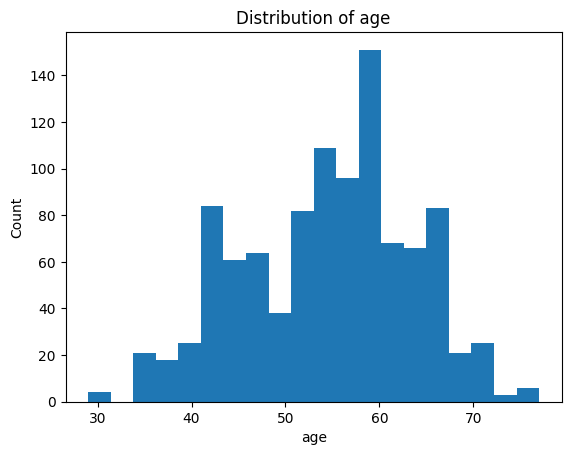

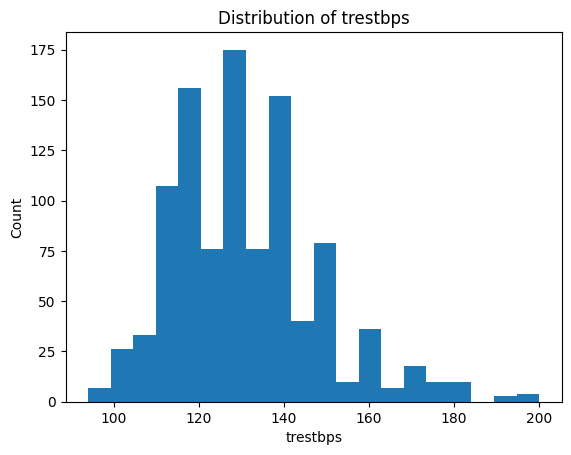

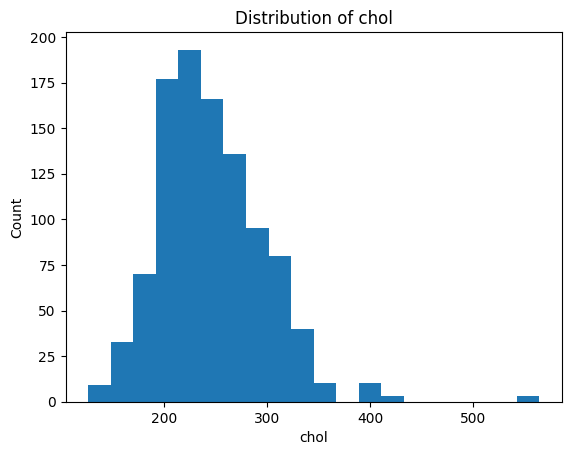

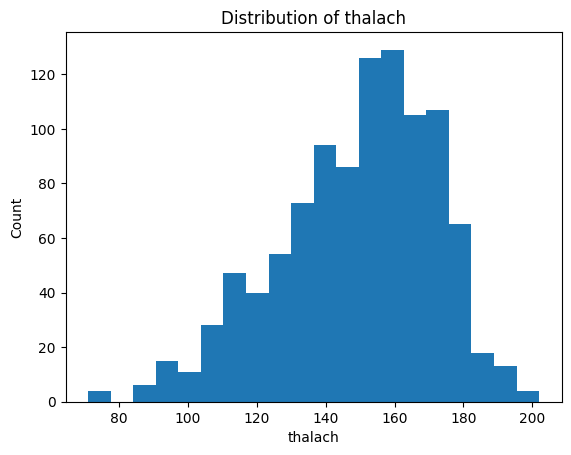

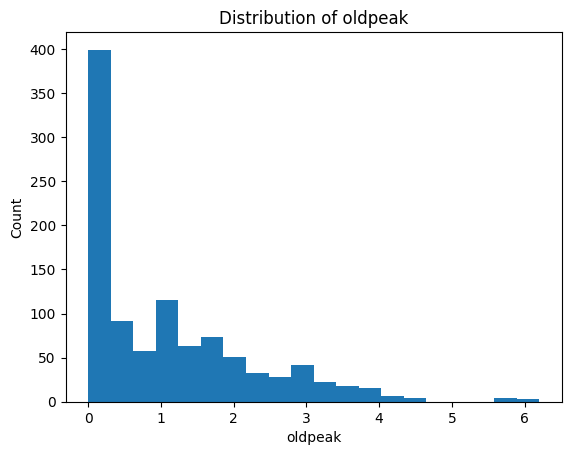

In [ ]:
numeric_cols = ["age","trestbps","chol","thalach","oldpeak"]

for col in numeric_cols:
    plt.figure()
    df[col].plot(kind="hist", bins=20, title=f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [ ]:
# คำนวนหา trestbps(ค่าเกิน 140 ถือว่าสูง), chol(ค่าเกิน 240 ถือว่าสูง) ที่เกินค่า
#print(df[df['trestbps'] > 140])

criteria = (("trestbps", 140), ("chol", 240))

for col, threshold in criteria:
    count = (df[col] > threshold).sum()
    print(f"{col}: {count} คน ค่าเกิน {threshold}")

trestbps: 217 คน ค่าเกิน 140
chol: 503 คน ค่าเกิน 240


### 🗨  **สรุปข้อมูลจากกราฟ**
▶ **Distribution of age:**   อายุเฉลี่ยอยู่ประมาน 54ปี → เป็นกลุ่มวัยกลางคนเป็นหลัก  
▶ **Distribution of trestbps:** กราฟมีความเบ้ขวาเล็กน้อย คนที่มีความดันโลหิตขณะพัก **สูง** มีอยู่ `217` คน  
▶ **Distribution of chol:** คนที่มีแคลเลอรี่ **สูง** มีอยู่ `503` คน แต่จากกราฟ cholesterol กระจายถึง 500+ → ⚠️  มีบางค่าผิดปกติ (outlier)  
▶ **Distribution of thalach (อัตราการเต้นหัวใจสูงสุด):** ค่ากระจาย 70–200 → กลุ่มปกติ

# Distribution Plots  📝
--> เราจะดูว่า feature ไหนมีแนวโน้มแยกกลุ่มโรคหัวใจได้ ตีความเชิงลึก (Heatmap + Plots ทั้งหมด)

### ตรวจความสัมพันธ์ (Correlation) และสร้าง Heatmap

---



,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


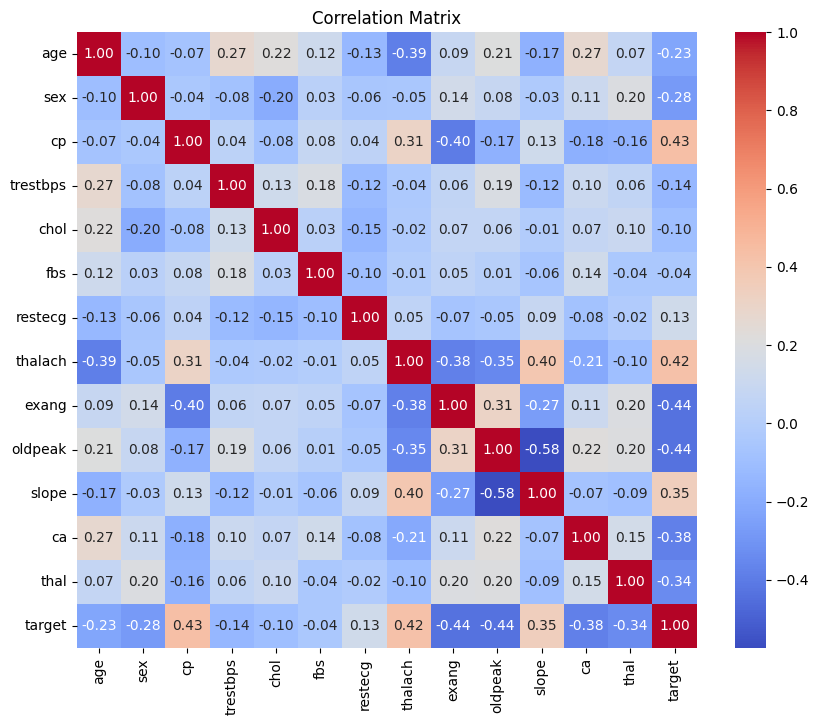

In [ ]:
corr = df.corr(numeric_only=True)
corr_target = corr["target"].sort_values(ascending=False)
display(corr_target)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Boxplot (ฟีเจอร์เชิงตัวเลข vs target)

In [ ]:
def cohens_d(x0, x1):
    n0, n1 = len(x0), len(x1)
    s0, s1 = np.var(x0, ddof=1), np.var(x1, ddof=1)
    sp = np.sqrt(((n0-1)*s0 + (n1-1)*s1) / (n0+n1-2))
    return (np.mean(x1) - np.mean(x0)) / sp

for col in ["age","trestbps","chol","thalach","oldpeak"]:
    g0 = df[df["target"]==0][col].dropna()
    g1 = df[df["target"]==1][col].dropna()
    print(col, "Cohen's d (1-0) =", round(cohens_d(g0, g1), 3))


age Cohen's d (1-0) = -0.471
trestbps Cohen's d (1-0) = -0.28
chol Cohen's d (1-0) = -0.201
thalach Cohen's d (1-0) = 0.933
oldpeak Cohen's d (1-0) = -0.975


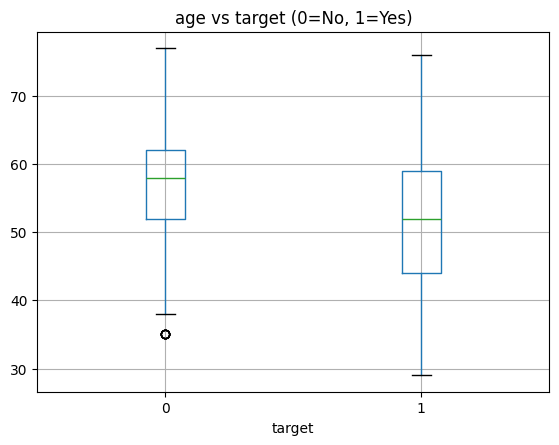

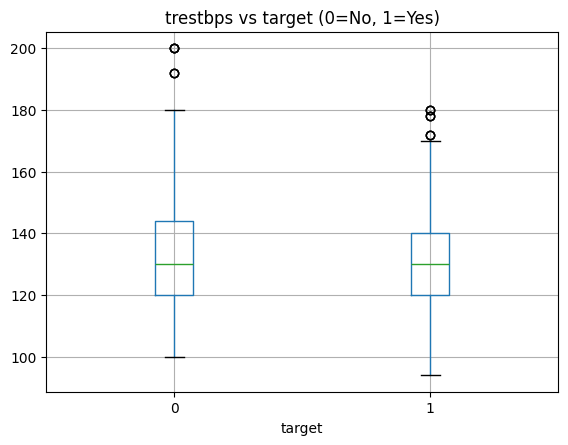

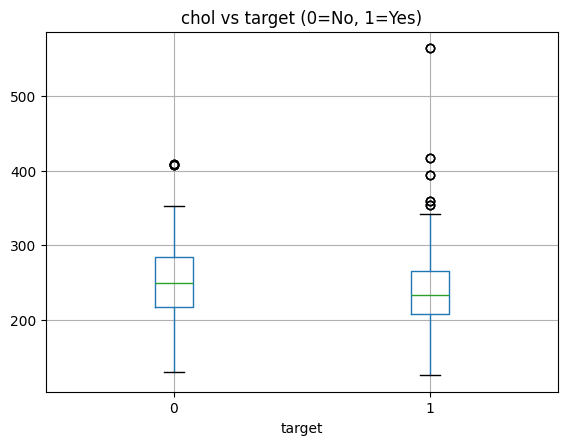

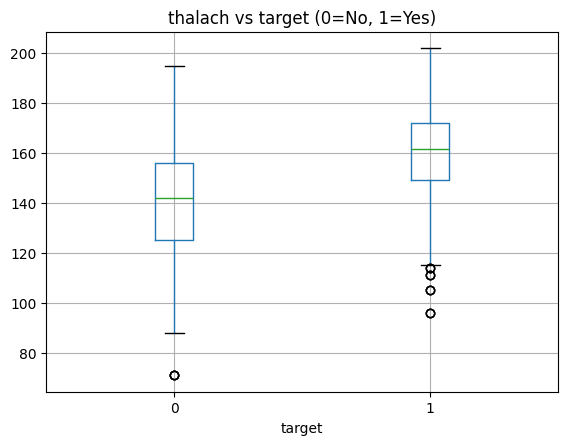

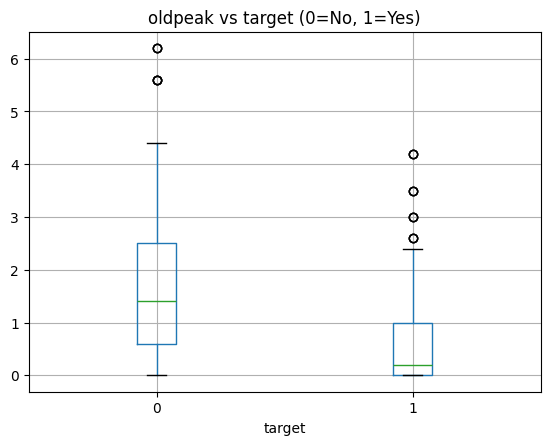

In [ ]:
features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for f in features:
    df.boxplot(column=f, by="target")
    plt.title(f"{f} vs target (0=No, 1=Yes)")
    plt.suptitle("")
    plt.show()

### วิเคราะห์ Countplot (ตัวแปรหมวดหมู่)

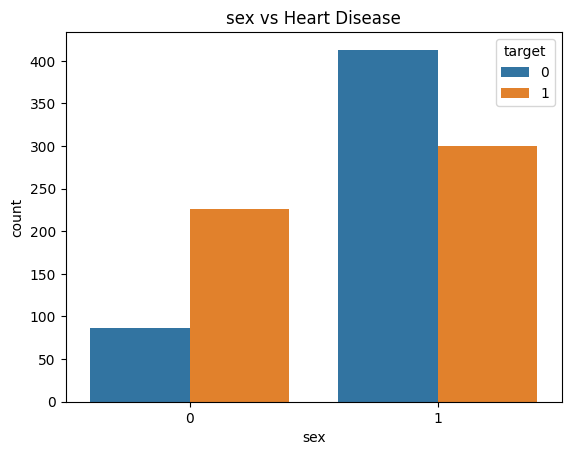

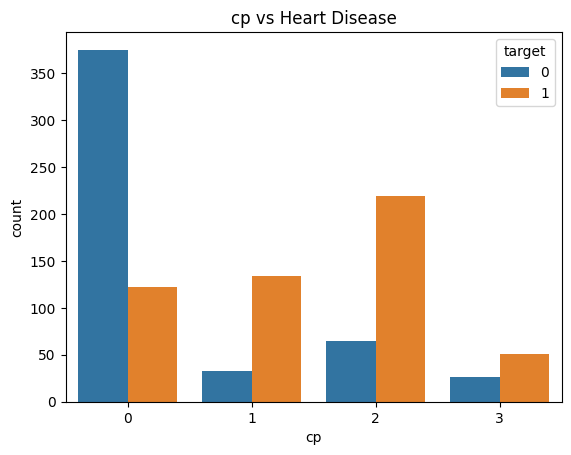

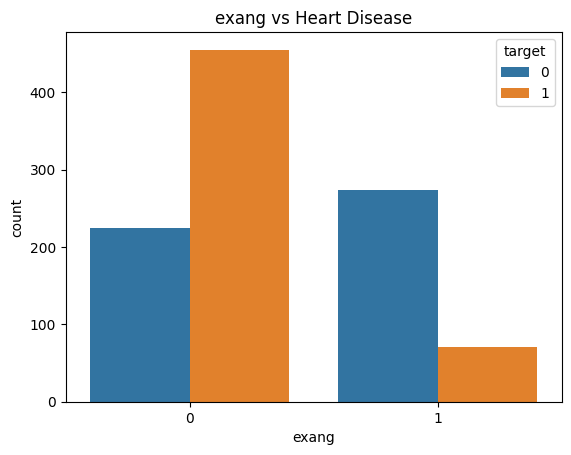

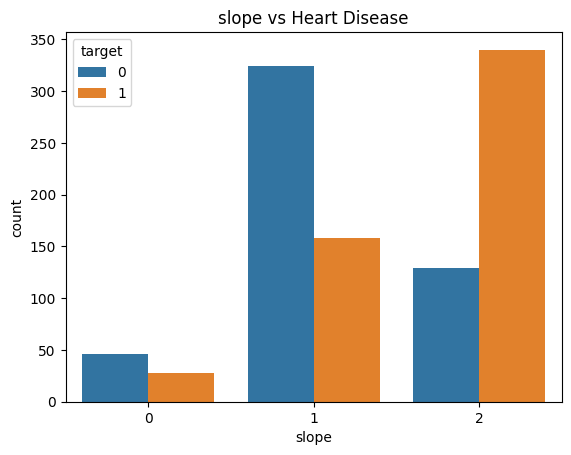

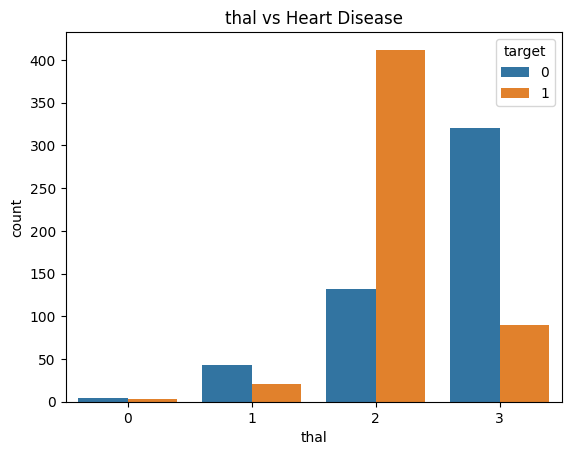

In [ ]:
cat_cols = ["sex","cp","exang","slope","thal"]
for c in cat_cols:
    sns.countplot(data=df, x=c, hue="target")
    plt.title(f"{c} vs Heart Disease")
    plt.show()


### Scatter Plot (Age vs Thalach)

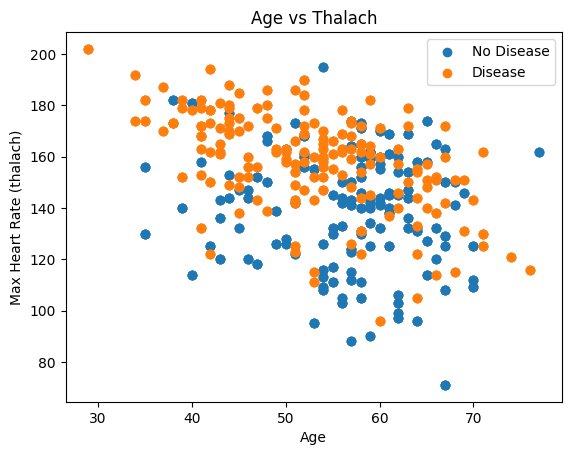

In [ ]:
plt.scatter(df[df.target==0]["age"], df[df.target==0]["thalach"], label="No Disease")
plt.scatter(df[df.target==1]["age"], df[df.target==1]["thalach"], label="Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Age vs Thalach")
plt.legend()
plt.show()

### Countplot (ตัวแปรหมวดหมู่ vs target) + สถิติที่เหมาะสม

---

ยืนยันเชิงสถิติ (Chi-square + Cramér’s V):

In [ ]:
for c in ["age","trestbps","chol","thalach","oldpeak"]:
    r, p = pointbiserialr(df[c], df["target"])
    print(f"{c}: r = {r:.3f}, p = {p:.4f}")

def cramers_v(conf):
    chi2 = chi2_contingency(conf)[0]
    n = conf.sum().sum()
    r,k = conf.shape
    return np.sqrt((chi2/n) / (min(r-1,k-1)))

for c in ["sex","cp","exang","slope","thal"]:
    v = cramers_v(pd.crosstab(df[c], df["target"]))
    print(f"{c}: Cramér’s V = {v:.3f}")


age: r = -0.229, p = 0.0000
trestbps: r = -0.139, p = 0.0000
chol: r = -0.100, p = 0.0014
thalach: r = 0.423, p = 0.0000
oldpeak: r = -0.438, p = 0.0000
sex: Cramér’s V = 0.277
cp: Cramér’s V = 0.524
exang: Cramér’s V = 0.436
slope: Cramér’s V = 0.390
thal: Cramér’s V = 0.523


### “ความซ้ำซ้อน” ของฟีเจอร์ (Multicollinearity)

In [ ]:
pairs = []
cols = corr.columns.tolist()
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        pairs.append((cols[i], cols[j], corr.iloc[i,j]))
pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)
pairs_sorted[:10]


[('oldpeak', 'slope', np.float64(-0.575188536437517)),
 ('oldpeak', 'target', np.float64(-0.4384412701119449)),
 ('exang', 'target', np.float64(-0.438028550055846)),
 ('cp', 'target', np.float64(0.434854250052737)),
 ('thalach', 'target', np.float64(0.4228954964828723)),
 ('cp', 'exang', np.float64(-0.40151271399953703)),
 ('thalach', 'slope', np.float64(0.395307843482417)),
 ('age', 'thalach', np.float64(-0.3902270750315936)),
 ('ca', 'target', np.float64(-0.3820852890386709)),
 ('thalach', 'exang', np.float64(-0.38028087239195574))]

### ตัวเลข vs target and หมวดหมู่ vs target

In [ ]:
for c in ["age","trestbps","chol","thalach","oldpeak"]:
    r, p = pointbiserialr(df[c], df["target"])
    print(f"{c}: r = {r:.3f}, p = {p:.4f}")

def cramers_v(conf):
    chi2 = chi2_contingency(conf)[0]
    n = conf.sum().sum()
    r,k = conf.shape
    return np.sqrt((chi2/n) / (min(r-1,k-1)))

for c in ["sex","cp","exang","slope","thal"]:
    v = cramers_v(pd.crosstab(df[c], df["target"]))
    print(f"{c}: Cramér’s V = {v:.3f}")


age: r = -0.229, p = 0.0000
trestbps: r = -0.139, p = 0.0000
chol: r = -0.100, p = 0.0014
thalach: r = 0.423, p = 0.0000
oldpeak: r = -0.438, p = 0.0000
sex: Cramér’s V = 0.277
cp: Cramér’s V = 0.524
exang: Cramér’s V = 0.436
slope: Cramér’s V = 0.390
thal: Cramér’s V = 0.523


# **Data Interpretation**


---



### ภาพรวมของข้อมูล



ชุดข้อมูลประกอบด้วยข้อมูลสุขภาพของผู้ป่วยจำนวน 1,025 คน
โดยมีตัวแปรสำคัญ เช่น อายุ (age), ความดันโลหิต (trestbps),
ระดับคอเลสเตอรอล (chol), อัตราการเต้นหัวใจสูงสุด (thalach),
และตัวชี้วัด ST depression (oldpeak) รวมถึงตัวแปรหมวดหมู่เช่น เพศ (sex),
อาการเจ็บหน้าอก (cp), และการออกกำลังกายที่เหนื่อยมาก (exang)
ซึ่งเป้าหมาย (target) คือการระบุว่าบุคคลนั้น
มีโรคหัวใจ (1) หรือ ไม่มีโรคหัวใจ (0)


---

### การกระจายของข้อมูล (Histogram)

**age** ช่วงอายุ 50–60 ปีมีจำนวนมากที่สุด แสดงว่ากลุ่มตัวอย่างส่วนใหญ่เป็นวัยกลางคน ซึ่งเป็นกลุ่มเสี่ยงของโรคหัวใจ  
**trestbps** ค่าเฉลี่ยอยู่ที่ 130 mmHg (สูงกว่าเกณฑ์เล็กน้อย) → บ่งบอกแนวโน้มความดันสูง  
**chol** ค่าเฉลี่ย 246 mg/dl โดยมี outlier สูงถึง 564 → พบภาวะไขมันในเลือดสูงในหลายราย  
**thalach** กระจายใกล้ปกติ ค่าเฉลี่ย 150 bpm → ผู้ที่ไม่มีโรคหัวใจมักทำ HR สูงกว่า  
**oldpeak** กระจายเอียงขวา (Skewed) มีค่าศูนย์มากที่สุด → คนส่วนใหญ่ไม่มี ST depression

---

### การววิเคราะห์ Boxplot เปรียบเทียบระหว่างกลุ่ม เป็นโรค/ไม่เป็นโรค จากการคำนวน Cohen’s d

**age** กลุ่มที่มีโรค (1) อายุน้อยกว่ากลุ่มไม่มีโรคเล็กน้อย `Cohen’s d = -0.471`  
**trestbps**
ค่ากลางของทั้งสองกลุ่มใกล้กัน `Cohen’s d = -0.280` → ไม่แตกต่างอย่างมีนัยสำคัญ  
**chol**
ค่าเฉลี่ยกลุ่มโรคต่ำกว่าเล็กน้อย `Cohen’s d = -0.201`  
**thalach**
กลุ่มโรคมีค่าเฉลี่ยต่ำกว่ามาก `Cohen’s d = +0.933` → ความแตกต่างขนาดใหญ่ แสดงถึงความสามารถหัวใจต่ำลง  
**oldpeak**
กลุ่มโรคมีค่าเฉลี่ยสูงกว่าอย่างชัดเจน `Cohen’s d = -0.975` → ภาวะ ST depression สูงขึ้น

  
  
*** **จากการคำนวนและสรุปได้ว่า thalach และ oldpeak เป็นตัวแปรที่แยกกลุ่มโรคกับไม่โรคได้ดีที่สุด** ***

---

### การวิเคราะห์ความสัมพันธ์ (Correlation & Heatmap)

**oldpeak** `-0.44`                          ยิ่งค่า ST depression สูง → ยิ่งเสี่ยงโรค      
 **exang**   `-0.44`                         การเจ็บหน้าอกจากการออกแรงสัมพันธ์กับการมีโรค    
**cp**      `+0.43`                          ประเภทของอาการเจ็บหน้าอกมีผลต่อโอกาสเป็นโรค    
 **thalach** `+0.42`                        ยิ่งอัตราการเต้นหัวใจสูงสุดสูง → โอกาสมีโรคลดลง
**slope**  `+0.35`                          รูปแบบกราฟ ST (Slope) บ่งบอกระดับความเสี่ยง    
**sex**     `-0.28`                         เพศชายมีความเสี่ยงมากกว่าเพศหญิง               
**age**     `-0.23`                          ยิ่งอายุมาก โอกาสเป็นโรคสูงขึ้นเล็กน้อย           

**ค่า correlation |corr| > 0.3 แสดงถึงความสัมพันธ์ระดับปานกลาง
ดังนั้น ตัวแปรที่สัมพันธ์กับโรคชัดเจนคือ oldpeak, exang, cp, thalach, slope**

---

### การวิเคราะห์เชิงสถิติ (Significance Test)

|ตัวแปร|ประเภท|ค่าสหสัมพันธ์ (r / V)|p-value|การตีความ|
|------------|-----------|---------------------|-------| ----------------------------------------|
| **age**         |Numeric| -0.229| 0.000 | อายุสูงมีแนวโน้มสัมพันธ์กับโรค|
| **trestbps**|Numeric| -0.139| 0.000| ความดันมีผลเล็กน้อย|
| **chol**        |Numeric| -0.100| 0.001|คอเลสเตอรอลมีผลเล็กน้อย|
| **thalach**  |Numeric|**+0.423**|0.000|นัยสำคัญสูง สมรรถภาพหัวใจสำคัญมาก|
| **oldpeak** |Numeric|**-0.438**|0.000| มีนัยสำคัญสูงมาก (ภาวะหัวใจขาดเลือด)|
| **sex**          |Categorical|0.277| — |เพศชายเสี่ยงมากกว่าเพศหญิง|
| **cp**        | Categorical| **0.524** | — | อาการเจ็บหน้าอกมีความสัมพันธ์สูง|
|**exang**| Categorical | **0.436** | — | การออกกำลังกายที่เจ็บอกสัมพันธ์กับโรค|
| **slope** | Categorical |0.390| —       | ความชัน ST มีผลระดับปานกลาง|
| **thal** |Categorical| **0.523** |—| ผลการทดสอบ thalium มีผลชัดเจนต่อโรคหัวใจ|  

-p < 0.05 = มีนัยสำคัญทางสถิติ  
-Cramér’s V ≥ 0.3 = มีความสัมพันธ์ระดับปานกลาง–สูง

---

### การวิเคราะห์ Scatter Plot (Age vs Thalach)

จากกราฟ Age vs Thalach พบว่า

* กลุ่ม ไม่มีโรค (0) สามารถทำอัตราการเต้นหัวใจสูงสุดได้มากกว่า

* กลุ่ม มีโรค (1) มีแนวโน้มทำ HR สูงสุดต่ำกว่า และกระจุกอยู่ในช่วง 40–60 ปี

* สรุปได้ว่าว่าสมรรถภาพหัวใจต่ำลงในกลุ่มโรคจริง
→ สอดคล้องกับค่า correlation ที่ thalach = +0.42  

---

### Insight จากการสอบถามบุคลากรทางแพทย์ ของข้อมูลที่เราวิเคราะห์
* ผู้ที่มีค่า oldpeak สูงกว่า 2.0 ควรได้รับการตรวจคลื่นหัวใจเพิ่มเติม

* ผู้ที่มีอัตราการเต้นหัวใจสูงสุดต่ำกว่า 130 bpm ระหว่างการออกกำลังกาย
มีแนวโน้มเป็นโรคหัวใจสูง

* เพศชายในช่วงอายุ 50–60 ปีเป็นกลุ่มเสี่ยงสำคัญ

* การใช้ตัวแปร thalach + oldpeak + cp + sex สามารถใช้เป็น early indicators
สำหรับระบบตรวจจับความเสี่ยงโรคหัวใจอัตโนมัติได้

---

#Modeling & Inference

---

###กำหนดฟีเจอร์ / แยก train–test / เตรียมพรีโพรเซส

เราใช้ตัวเลขสเกลด้วย StandardScaler และตัวแปรหมวดหมู่ด้วย OneHotEncoder ใน ColumnTransformer (ทำให้ Pipeline ประเมินซ้ำได้ถูกต้อง)

In [ ]:
# Features ทั้งหมด 13 ตัว
num_cols = ["age","trestbps","chol","thalach","oldpeak"]
cat_cols = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

X = df[num_cols + cat_cols].copy()
y = df["target"].astype(int)

# แบ่ง Test Train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess
numeric_tf = Pipeline([("scaler", StandardScaler())])
categoric_tf = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categoric_tf, cat_cols),
    ]
)

###เทรน Logistic Regression และ วัดผล

ใช้ metric: Accuracy, Precision, Recall, F1, ROC-AUC + Confusion Matrix + ROC Curve

Accuracy : 0.873
Precision: 0.856
Recall   : 0.905
F1-score : 0.880
ROC-AUC  : 0.944


<Figure size 640x480 with 0 Axes>

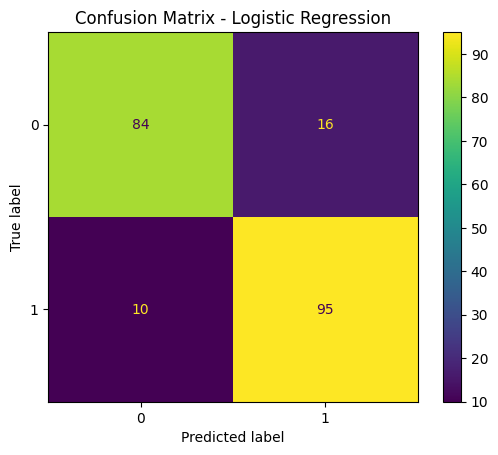

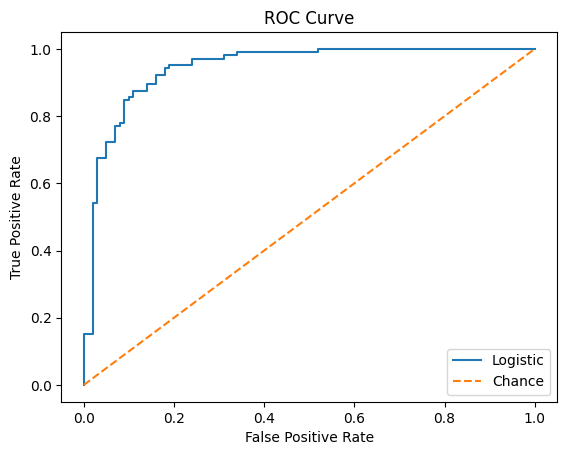

In [ ]:
logit_clf = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=None))
])
logit_clf.fit(X_train, y_train)

# Predict
y_pred = logit_clf.predict(X_test)
y_proba = logit_clf.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {pre:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC-AUC  : {roc:.3f}")

# Confusion Matrix
plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label="Logistic")
plt.plot([0,1],[0,1],"--", label="Chance")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### ดึงชื่อฟีเจอร์หลัง One-Hot + ค่าสัมประสิทธิ์ + Odds Ratio

ตอบโจทย์ 1: ฟีเจอร์ไหนมีผลมากสุด

In [ ]:
# ดึงชื่อฟีเจอร์หลัง preprocess
prep = logit_clf.named_steps["prep"]
oh = prep.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = list(oh.get_feature_names_out(cat_cols))
feature_names = num_cols + cat_feature_names

# ดึงค่าสัมประสิทธิ์จากโมเดล
coef = logit_clf.named_steps["clf"].coef_.ravel()
odds = np.exp(coef)

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef_logit": coef,
    "odds_ratio": odds
}).sort_values("odds_ratio", ascending=False)

coef_df.head(20)

,feature,coef_logit,odds_ratio
25,ca_4,1.484256,4.411681
21,ca_0,1.374801,3.954288
5,sex_0,0.810115,2.248166
10,cp_3,0.774109,2.168659
9,cp_2,0.772631,2.165457
20,slope_2,0.645702,1.907326
28,thal_2,0.623250,1.864980
27,thal_1,0.563323,1.756500
16,exang_0,0.403344,1.496822
3,thalach,0.338021,1.402170


###Top Factors

In [ ]:
top_up   = coef_df.sort_values("odds_ratio", ascending=False).head(10)
top_down = coef_df.sort_values("odds_ratio", ascending=True).head(10)

print("Top factors that INCREASE odds (OR > 1):")
display(top_up)

print("Top factors that DECREASE odds (OR < 1):")
display(top_down)

Top factors that INCREASE odds (OR > 1):


,feature,coef_logit,odds_ratio
25,ca_4,1.484256,4.411681
21,ca_0,1.374801,3.954288
5,sex_0,0.810115,2.248166
10,cp_3,0.774109,2.168659
9,cp_2,0.772631,2.165457
20,slope_2,0.645702,1.907326
28,thal_2,0.623250,1.864980
27,thal_1,0.563323,1.756500
16,exang_0,0.403344,1.496822
3,thalach,0.338021,1.402170


Top factors that DECREASE odds (OR < 1):


,feature,coef_logit,odds_ratio
23,ca_2,-1.716076,0.179770
7,cp_0,-1.227241,0.293100
6,sex_1,-0.815395,0.442465
29,thal_3,-0.675963,0.508666
22,ca_1,-0.635501,0.529670
19,slope_1,-0.606247,0.545394
26,thal_0,-0.515890,0.596969
24,ca_3,-0.512758,0.598841
4,oldpeak,-0.445043,0.640796
17,exang_1,-0.408624,0.664564


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ==== คอลัมน์เหมือนเดิม ====
num_cols = ["age","trestbps","chol","thalach","oldpeak"]
cat_cols = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

# 1) สร้าง OneHotEncoder (เวอร์ชันใหม่ใช้ sparse_output=False)
oh_sm = OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False)

# 2) สร้าง ColumnTransformer
preprocess_sm = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", oh_sm, cat_cols),
], remainder="drop", sparse_threshold=0)

# 3) ⭐ FIT + TRANSFORM ในคำสั่งเดียว (แก้ NotFittedError ตรงนี้)
X_sm = preprocess_sm.fit_transform(df[num_cols + cat_cols])

# 4) หลัง fit แล้วจึงดึงชื่อฟีเจอร์จาก encoder ข้างใน
oh_fitted = preprocess_sm.named_transformers_["cat"]
feature_names_sm = list(num_cols) + list(oh_fitted.get_feature_names_out(cat_cols))

# 5) DataFrame ของดีไซน์เมทริกซ์ + intercept
X_sm_df = pd.DataFrame(X_sm, columns=feature_names_sm)
X_sm_df = sm.add_constant(X_sm_df, has_constant="add")
y_all = df["target"].astype(int).values

# 6) Fit logistic regression (statsmodels)
logit_sm = sm.Logit(y_all, X_sm_df).fit(disp=False)

# 7) สร้างตาราง OR + 95% CI
params = logit_sm.params
conf   = logit_sm.conf_int()
pvals  = logit_sm.pvalues

sm_df = pd.DataFrame({
    "feature": params.index,
    "coef": params.values,
    "p_value": pvals.values,
    "ci_low": conf[0].values,
    "ci_high": conf[1].values,
})
sm_df["odds_ratio"] = np.exp(sm_df["coef"])
sm_df["or_ci_low"]  = np.exp(sm_df["ci_low"])
sm_df["or_ci_high"] = np.exp(sm_df["ci_high"])
sm_df = sm_df[sm_df["feature"] != "const"].sort_values("odds_ratio", ascending=False)

# 8) ตรวจสอบเร็ว ๆ
print("X_sm_df shape:", X_sm_df.shape)
print("params:", params.shape, "conf:", conf.shape, "pvals:", pvals.shape)
display(sm_df.head(10))
display(sm_df.tail(10))


X_sm_df shape: (1025, 23)
params: (23,) conf: (23, 2) pvals: (23,)


,feature,coef,p_value,ci_low,ci_high,odds_ratio,or_ci_low,or_ci_high
20,thal_1,2.796813,5.646374e-02,-0.077015,5.670642,16.392323,0.925876,290.220662
9,cp_3,2.409722,7.861522e-10,1.641472,3.177972,11.130866,5.162764,23.998032
21,thal_2,2.404646,9.073769e-02,-0.381618,5.190910,11.074505,0.682756,179.631854
8,cp_2,2.006394,2.411526e-12,1.445283,2.567505,7.436454,4.243053,13.033267
19,ca_4,1.565677,9.236814e-02,-0.257618,3.388971,4.785912,0.772891,29.635434
22,thal_3,0.991243,4.863735e-01,-1.799783,3.782269,2.694582,0.165335,43.915572
7,cp_1,0.886380,4.100211e-03,0.281132,1.491629,2.426331,1.324628,4.444328
15,slope_2,0.799689,1.129463e-01,-0.189127,1.788505,2.224848,0.827681,5.980503
11,restecg_1,0.397268,6.837756e-02,-0.029962,0.824497,1.487754,0.970483,2.280734
10,fbs_1,0.380096,2.343626e-01,-0.246356,1.006549,1.462425,0.781644,2.736141


,feature,coef,p_value,ci_low,ci_high,odds_ratio,or_ci_low,or_ci_high
3,chol,-0.005462,1.791620e-02,-0.009983,-0.000940,0.994553,0.990066,0.999061
2,trestbps,-0.024979,1.329676e-04,-0.037792,-0.012166,0.975330,0.962913,0.987908
5,oldpeak,-0.403411,2.269534e-03,-0.662436,-0.144386,0.668037,0.515594,0.865554
14,slope_1,-0.595618,2.070655e-01,-1.520887,0.329651,0.551222,0.218518,1.390483
13,exang_1,-0.750331,2.557749e-03,-1.237870,-0.262793,0.472210,0.290001,0.768901
12,restecg_2,-0.800417,6.025494e-01,-3.813042,2.212208,0.449142,0.022081,9.135869
6,sex_1,-1.992347,2.285531e-10,-2.608187,-1.376507,0.136375,0.073668,0.252459
18,ca_3,-2.288131,1.709475e-05,-3.331121,-1.245141,0.101456,0.035753,0.287900
16,ca_1,-2.334076,3.993648e-16,-2.896165,-1.771987,0.096900,0.055235,0.169995
17,ca_2,-3.597039,6.195052e-16,-4.468988,-2.725091,0.027405,0.011459,0.065540


# 🫀 สรุปโครงงาน: การวิเคราะห์ปัจจัยที่ส่งผลต่อความเสี่ยงโรคหัวใจ


###1.  ข้อมูลและโจทย์
* ชุดข้อมูล: Heart Disease (Cleveland-style), 1,025 แถว, 14+ ตัวแปรสุขภาพ
* ตัวแปรเป้าหมาย: target (1 = มีโรคหัวใจ, 0 = ไม่มี)
* โจทย์วิจัย
    1. ปัจจัยใด “มีผลมาก” ต่อความเสี่ยงโรคหัวใจ
    2. ความเสี่ยงต่างกันระหว่างเพศหรือไม่ (ทั้งแบบไม่คุมปัจจัย และแบบคุมปัจจัยในโมเดล)


###2.   สำรวจข้อมูล (EDA)
* สถิติพื้นฐาน: อายุเฉลี่ย ~54.4 ปี; ความดันพักเฉลี่ย ~131.6 mmHg; Chol ~246 mg/dl
* การกระจาย:
  * age กระจุก 50–60 ปี (วัยเสี่ยง)
  * chol มี outlier สูงถึง ~564 mg/dl (ควรระวังตีความ)
  * thalach (HR สูงสุด) ใกล้ปกติ เฉลี่ย ~149 bpm
  * oldpeak (ST depression) เอียงขวา มีค่า 0 เยอะ
* Boxplot (แยกตาม target):
  * กลุ่มโรค: thalach สูงกว่า (Cohen’s d ≈ +0.933)
  * กลุ่มโรค: oldpeak ต่ำกว่า (Cohen’s d ≈ −0.975)
  * age/trestbps/chol ต่างกันเล็กน้อย (|d| ≤ ~0.47)
* ความสัมพันธ์ (corr กับ target):
  * เด่นสุด: oldpeak −0.438, exang −0.438, cp +0.435, thalach +0.423, slope +0.346
  * อื่นๆ: sex −0.280, ca −0.382, thal −0.338, age −0.229
* ทดสอบเชิงสถิติ
  * Point-biserial (r, p): thalach r=+0.423, oldpeak r=−0.438 (p≈0.000 ทั้งคู่)
  * Cramér’s V (กับตัวแปรหมวดหมู่): cp 0.524, thal 0.523, exang 0.436, slope 0.390, sex 0.277
⇒ บ่งชี้ว่าหมวด cp/thal/exang สัมพันธ์กับโรคเด่นมาก

###3) ผลโมเดล Logistic Regression (Pipeline + Metrics)
ชุดฟีเจอร์: ตัวเลข (age, trestbps, chol, thalach, oldpeak) + หมวดหมู่ (sex, cp, fbs, restecg, exang, slope, ca, thal)
แบ่งชุด: train 80% / test 20% (stratify) + Scaling/One-Hot ใน ColumnTransformer
* ประสิทธิภาพบนชุดทดสอบ
  * Accuracy = 0.873
  * Precision = 0.856
  * Recall = 0.905
  * F1-score = 0.880
  * ROC-AUC = 0.944
  * Confusion Matrix: TN=84, FP=16, FN=10, TP=95
→ โมเดลเก็บผู้ป่วยได้ดี (FN ต่ำ), เหมาะกับงานคัดกรองเบื้องต้น

###4) การอนุมานเชิงสถิติ (Odds Ratio + 95% CI, จาก statsmodels Logit)
ใช้ดีไซน์เมทริกซ์ one-hot (drop='first') เพื่อให้ได้ coef, p-value, 95% CI ที่อ่านตรง

####4.1 ตัวแปรที่ เพิ่ม โอกาสเกิดโรค (OR>1) — นัยสำคัญ
* cp_3 (อาการเจ็บหน้าอกชนิด 3): OR ≈ 11.13, 95% CI ~ [5.16, 24.00], p ≪ 0.001
* cp_2: OR ≈ 7.44, 95% CI ~ [4.24, 13.03], p ≪ 0.001
* cp_1: OR ≈ 2.43, 95% CI ~ [1.32, 4.44], p ≈ 0.004
* แปล: ประเภทของอาการเจ็บหน้าอก (cp) เป็นปัจจัยทำนายที่แรงมากที่สุดในข้อมูลนี้

####4.2 ตัวแปรที่ ลด โอกาสเกิดโรค (OR<1) — นัยสำคัญ
* ca_2: OR ≈ 0.027, 95% CI ~ [0.011, 0.066], p ≪ 0.001
* ca_1: OR ≈ 0.097, 95% CI ~ [0.055, 0.170], p ≪ 0.001
* ca_3: OR ≈ 0.101, 95% CI ~ [0.036, 0.288], p < 0.001
* sex_1 (ชายเทียบหญิง): OR ≈ 0.136, 95% CI ~ [0.074, 0.252], p ≪ 0.001
* exang_1 (ออกกำลังแล้วเจ็บอก): OR ≈ 0.472, 95% CI ~ [0.290, 0.769], p ≈ 0.0026
* oldpeak (เชิงเส้น, สเกลมาตรฐาน): OR ≈ 0.668, 95% CI ~ [0.516, 0.866], p ≈ 0.0023
* trestbps: OR ≈ 0.975 ต่อ 1 หน่วย, 95% CI ~ [0.963, 0.988], p ≈ 1.3e-4
* chol: OR ≈ 0.995 ต่อ 1 หน่วย, 95% CI ~ [0.990, 0.999], p ≈ 0.018

กลุ่ม ca_* แสดงความสัมพันธ์เชิงลบแรงมาก (ค่า OR ต่ำมาก) — สะท้อนว่าระดับการมองเห็นหลอดเลือดผิดปกติในฟลูออโรสโกปีสัมพันธ์เชิงซับซ้อนกับการกำหนด “กลุ่มอ้างอิง” ของ one-hot (ตีความต้องระบุ baseline ชัดเจนในรายงาน)

####4.3 ตัวแปรที่ OR สูงมากแต่ ไม่ นัยสำคัญ
* thal_1: OR ~ 16.39, p ≈ 0.056 (เฉียด)
* thal_2: OR ~ 11.07, p ≈ 0.091
* slope_2: OR ~ 2.22, p ≈ 0.113

###5) ตอบโจทย์
####Q1) ปัจจัยไหน “มีผลมากที่สุด” ต่อความเสี่ยงโรคหัวใจ?
* ชัดเจนที่สุด (มีนัยสำคัญ): หมวด อาการเจ็บหน้าอก (cp_3, cp_2, cp_1) — OR สูงมาก
* มีผลลดความเสี่ยงอย่างชัด (นัยสำคัญ): ca_2, ca_1, ca_3, sex_1, exang_1, oldpeak
* ตัวเลขพื้นฐาน (เชิงเส้น): trestbps และ chol มีผลทางสถิติแต่ขนาดผลเล็ก (OR ~ 0.98 และ 0.995 ต่อ 1 หน่วย)

สรุปสั้นๆ: ในข้อมูลนี้ pattern ของอาการเจ็บหน้าอก (cp) คือสัญญาณทำนายที่แรงที่สุด รองลงมาคือกลุ่มตัวแปรหลอดเลือด (ca_*) และตัวชี้ ST/ECG (oldpeak, exang)

####Q2) ความเสี่ยงต่างกันระหว่างเพศหรือไม่?

* แบบคุมปัจจัย (Adjusted): sex_1 (ชาย) OR ≈ 0.136, p ≪ 0.001 → ในโมเดลที่คุมตัวแปรอื่น ชายมี odds เป็นโรคต่ำกว่าหญิงอย่างมีนัยสำคัญในชุดนี้

* แบบไม่คุมปัจจัย (Crude rate): (ให้รายงานค่าที่นายคำนวณจริงจาก risk_by_sex) → ใช้เพื่อเทียบว่า crude vs adjusted แตกต่างเพราะ confounding อะไรบ้าง

ข้อจำกัด: สัดส่วนชายในข้อมูลมากกว่า ~70% → อาจมี sampling/measurement bias

## 🧾 Conclusion — Heart Disease Risk Analysis

**Model performance**: Acc 0.873, Prec 0.856, Recall 0.905, F1 0.880, ROC-AUC 0.944.  
Confusion Matrix: TN=84, FP=16, FN=10, TP=95 → เก็บผู้ป่วยได้ดี (FN ต่ำ)

**Key determinants (Adjusted by logistic regression with 95% CI)**  
- ↑ ความเสี่ยง: `cp_3` (OR≈11.13, p≪0.001), `cp_2` (OR≈7.44, p≪0.001), `cp_1` (OR≈2.43, p≈0.004).  
- ↓ ความเสี่ยง: `ca_2` (OR≈0.027, p≪0.001), `ca_1` (OR≈0.097, p≪0.001), `ca_3` (OR≈0.101, p<0.001),  
  `sex_1` ชาย (OR≈0.136, p≪0.001), `exang_1` (OR≈0.472, p≈0.0026), `oldpeak` (OR≈0.668, p≈0.0023).  
- แนวโน้มแต่ยังไม่ชัด: `thal_1` (OR≈16.39, p≈0.056), `thal_2` (OR≈11.07, p≈0.091), `slope_2` (OR≈2.22, p≈0.113).

**Answer to RQ#1**: ปัจจัยที่มีอิทธิพลต่อโอกาสเกิดโรคแรงสุดคือ “ประเภทอาการเจ็บหน้าอก (cp)” ตามลำดับ cp_3 > cp_2 > cp_1;  
ตัวแปรจากภาพรังสี/ECG อย่าง `ca_*`, `oldpeak`, `exang` ก็มีผลอย่างมีนัยสำคัญ

**Answer to RQ#2**: ความเสี่ยงต่างกันตามเพศ — หลังควบคุมปัจจัย ชาย (sex_1) มี odds เป็นโรค **ต่ำกว่า** หญิงอย่างมีนัยสำคัญ (OR≈0.136).  
(แนบค่า crude rate จาก `risk_by_sex` เพื่อเทียบความแตกต่างก่อน/หลังคุมปัจจัย)

**Limitations**: ความเป็นตัวแทนประชากร, baseline ของ one-hot, outlier (chol), ความสัมพันธ์ ≠ เหตุ-ผล, ยังไม่ได้ทำ calibration.

**Recommendations**: ใช้ cp/oldpeak/exang/thalach/ca เป็นแกนคัดกรอง; ปรับ threshold เพื่อลด FN;  
ทำ K-fold ROC-AUC และ calibration; เสริม SHAP สำหรับการสื่อสารผล.
